# Movie Recommendation 

In [2]:
from math import sqrt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Importing and Exploring Data

In [3]:
import pandas as pd

# Reading ratings file
ratings = pd.read_csv('/Users/mikhailpinto/Downloads/Sem 2/IST707 - AML/Project/Project stage 2/Movie Recommendation/ratings.csv', sep=',', encoding='latin-1', usecols=['userId','movieId','rating','timestamp'])

# Reading movies file
movies = pd.read_csv('/Users/mikhailpinto/Downloads/Sem 2/IST707 - AML/Project/Project stage 2/Movie Recommendation/movies.csv', sep=',', encoding='latin-1', usecols=['movieId','title','genres'])

In [4]:
df_movies = movies 
df_ratings = ratings 

In [5]:
df_movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Popoular Genres

<BarContainer object of 19 artists>

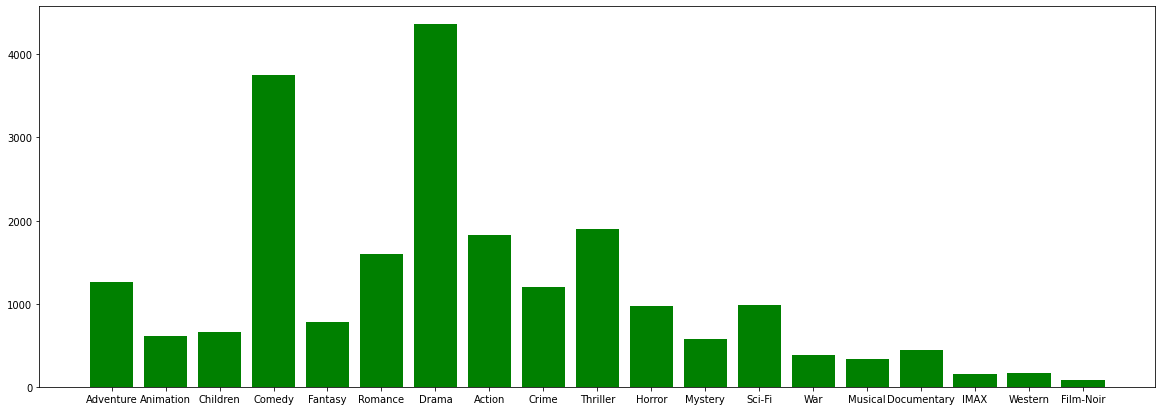

In [6]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,7))
generlist = df_movies['genres'].apply(lambda generlist_movie : str(generlist_movie).split("|"))
geners_count = {}

for generlist_movie in generlist:
    for gener in generlist_movie:
        if(geners_count.get(gener,False)):
            geners_count[gener]=geners_count[gener]+1
        else:
            geners_count[gener] = 1       
geners_count.pop("(no genres listed)")
plt.bar(geners_count.keys(),geners_count.values(),color='g')

In [7]:
df_ratings.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# User Rating Distribution

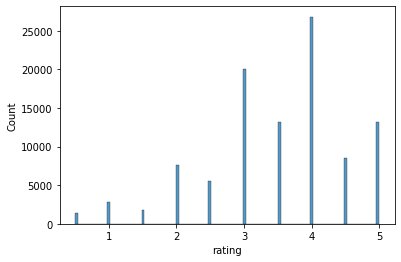

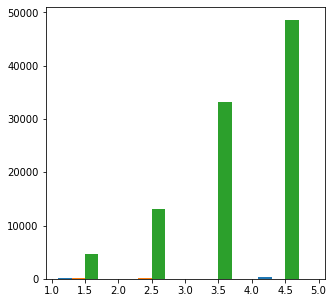

In [8]:
import seaborn as sns
sns.histplot(df_ratings["rating"]);
fig, ax = plt.subplots(figsize =(5, 5))
ax.hist(df_ratings, bins = [1, 2, 3, 4, 5])
plt.show()

In [9]:
print("Shape of frames: \n"+ " Rating DataFrame"+ str(df_ratings.shape)+"\n Movies DataFrame"+ str(df_movies.shape))

Shape of frames: 
 Rating DataFrame(100836, 4)
 Movies DataFrame(9742, 3)


In [10]:
merge_ratings_movies = pd.merge(df_movies, df_ratings, on='movieId', how='inner')
merge_ratings_movies.head(3)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946


In [11]:
merge_ratings_movies = merge_ratings_movies.drop('timestamp', axis=1)

In [12]:
merge_ratings_movies.shape

(100836, 5)

# Group by rating based on user

In [13]:
ratings_grouped_by_users = merge_ratings_movies.groupby('userId').agg([np.size, np.mean])

/var/folders/wx/852r88fd5c9bp8fg25634ft40000gn/T/ipykernel_1572/325471676.py:1: FutureWarning: ['title', 'genres'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  ratings_grouped_by_users = merge_ratings_movies.groupby('userId').agg([np.size, np.mean])


In [14]:
ratings_grouped_by_users.head(2)

movieId               rating          
          size          mean   size      mean
userId                                       
1          232   1854.603448    232  4.366379
2           29  70350.275862     29  3.948276

In [15]:
ratings_grouped_by_users = ratings_grouped_by_users.drop('movieId', axis = 1)

# Users who have rated the most amount of movies

<AxesSubplot:xlabel='userId'>

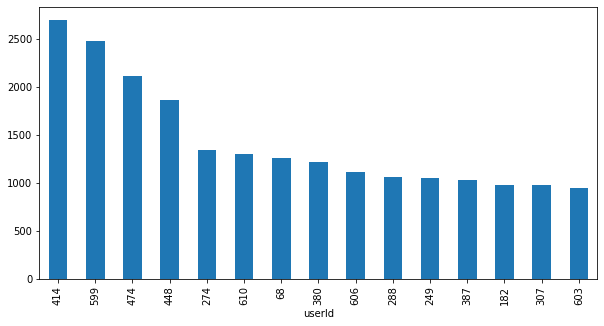

In [16]:
ratings_grouped_by_users['rating']['size'].sort_values(ascending=False).head(15).plot(kind = 'bar', figsize = (10,5))

In [17]:
ratings_grouped_by_movies = merge_ratings_movies.groupby('movieId').agg([np.mean], np.size)

/var/folders/wx/852r88fd5c9bp8fg25634ft40000gn/T/ipykernel_1572/2038148947.py:1: FutureWarning: ['title', 'genres'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  ratings_grouped_by_movies = merge_ratings_movies.groupby('movieId').agg([np.mean], np.size)


In [18]:
ratings_grouped_by_movies.shape

(9724, 2)

In [19]:
ratings_grouped_by_movies.head(5)

,userId,rating
,mean,mean
movieId,,
1,306.530233,3.920930
2,329.554545,3.431818
3,283.596154,3.259615
4,219.857143,2.357143
5,299.571429,3.071429


In [20]:
ratings_grouped_by_movies = ratings_grouped_by_movies.drop('userId', axis=1)

# Movies with high average rating

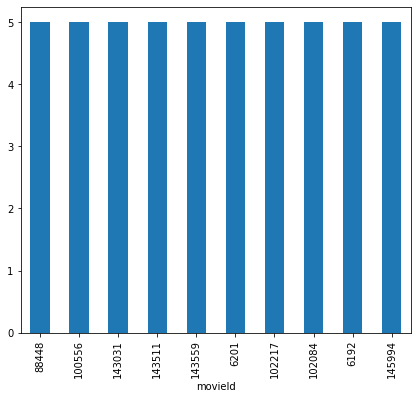

In [21]:
ratings_grouped_by_movies['rating']['mean'].sort_values(ascending=False).head(10).plot(kind='bar', figsize=(7,6));

In [22]:
low_rated_movies_filter = ratings_grouped_by_movies['rating']['mean']< 1.5

In [23]:
low_rated_movies = ratings_grouped_by_movies[low_rated_movies_filter]

# Movies with low average rating

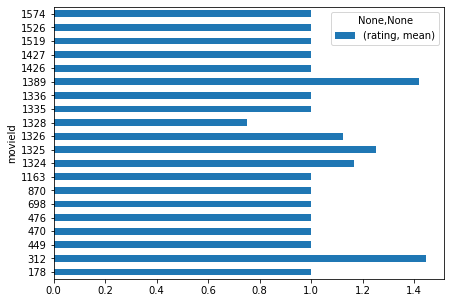

In [24]:
low_rated_movies.head(20).plot(kind='barh', figsize=(7,5));

In [25]:
low_rated_movies.head(10)

,rating
,mean
movieId,
178,1.000000
312,1.444444
449,1.000000
470,1.000000
476,1.000000
698,1.000000
870,1.000000
1163,1.000000


# Content based filtering

TF is simply the frequency of a word in a document. IDF is the inverse of the document frequency among the whole corpus of documents. TF-IDF is used mainly because of two reasons: Suppose we search for “the rise of analytics” on Google. It is certain that “the” will occur more frequently than “analytics” but the relative importance of analytics is higher than the search query point of view. In such cases, TF-IDF weighting negates the effect of high frequency words in determining the importance of an item (document).

For calculating distances, many similarity coefficients can be calculated. Most widely used similarity coefficients are Euclidean, Cosine, Pearson Correlation etc.

Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. Given two vectors of attributes, A and B, the cosine similarity, cos(θ), is represented using a dot product and magnitude as Inline-style:  alt text

We will use cosine distance here. Here we are insterested in similarity. That means higher the value more similar they are. But as the function gives us the distance, we will deduct it from 1.

In [26]:
# Define a TF-IDF Vectorizer Object.
tfidf_movies_genres = TfidfVectorizer(token_pattern = '[a-zA-Z0-9\-]+')

#Replace NaN with an empty string
df_movies['genres'] = df_movies['genres'].replace(to_replace="(no genres listed)", value="")

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_movies_genres_matrix = tfidf_movies_genres.fit_transform(df_movies['genres'])
print(tfidf_movies_genres.get_feature_names())
#Compute the cosine similarity matrix
print(tfidf_movies_genres_matrix.shape)
print(tfidf_movies_genres_matrix.dtype)
cosine_sim_movies = linear_kernel(tfidf_movies_genres_matrix, tfidf_movies_genres_matrix)
print(cosine_sim_movies)

['action', 'adventure', 'animation', 'children', 'comedy', 'crime', 'documentary', 'drama', 'fantasy', 'film-noir', 'horror', 'imax', 'musical', 'mystery', 'romance', 'sci-fi', 'thriller', 'war', 'western']
(9742, 19)
float64


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[[1.         0.81357774 0.15276924 ... 0.         0.4210373  0.26758648]
 [0.81357774 1.         0.         ... 0.         0.         0.        ]
 [0.15276924 0.         1.         ... 0.         0.         0.57091541]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.4210373  0.         0.         ... 0.         1.         0.        ]
 [0.26758648 0.         0.57091541 ... 0.         0.         1.        ]]


In [27]:
def get_recommendations_based_on_movies(movie_title, cosine_sim_movies=cosine_sim_movies):

    # Get the index of the movie that matches the title
    idx_movie = df_movies.loc[df_movies['title'].isin([movie_title])]
    idx_movie = idx_movie.index
    
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores_movies = list(enumerate(cosine_sim_movies[idx_movie][0]))
    
    # Sort the movies based on the similarity scores
    sim_scores_movies = sorted(sim_scores_movies, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores_movies = sim_scores_movies[1:5]
    
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores_movies]
    
    # Return the top 2 most similar movies
    return df_movies['title'].iloc[movie_indices]

In [28]:
get_recommendations_based_on_movies("Father of the Bride Part II (1995)")

17                        Four Rooms (1995)
18    Ace Ventura: When Nature Calls (1995)
58                          Bio-Dome (1996)
61                            Friday (1995)
Name: title, dtype: object

In [30]:
def get_recommendation_content_model(userId):
    """
    Calculates top movies to be recommended to user based on movie user has watched.  
    """
    recommended_movie_list = []
    movie_list = []
    df_rating_filtered = df_ratings[df_ratings["userId"]== userId]
    for key, row in df_rating_filtered.iterrows():
        movie_list.append((df_movies["title"][row["movieId"]==df_movies["movieId"]]).values) 
    for index, movie in enumerate(movie_list):
        for key, movie_recommended in get_recommendations_based_on_movies(movie[0]).iteritems():
            recommended_movie_list.append(movie_recommended)

    # removing already watched movie from recommended list    
    for movie_title in recommended_movie_list:
        if movie_title in movie_list:
            recommended_movie_list.remove(movie_title)
    
    return set(recommended_movie_list)
get_recommendation_content_model(1)

{'101 Dalmatians (One Hundred and One Dalmatians) (1961)',
 '39 Steps, The (1935)',
 'Ace Ventura: When Nature Calls (1995)',
 'Adventures in Babysitting (1987)',
 'Adventures of Baron Munchausen, The (1988)',
 'Adventures of Rocky and Bullwinkle, The (2000)',
 'Agent Cody Banks (2003)',
 'Alamo, The (1960)',
 'Alien Nation (1988)',
 'All Dogs Go to Heaven 2 (1996)',
 'Allan Quatermain and the Lost City of Gold (1987)',
 'Almost Heroes (1998)',
 'Alvin and the Chipmunks: The Squeakquel (2009)',
 'Amateur (1994)',
 'Amazing Panda Adventure, The (1995)',
 'American Astronaut, The (2001)',
 'Anastasia (1997)',
 "Antonia's Line (Antonia) (1995)",
 'Antz (1998)',
 'Apocalypse Now (1979)',
 'Aristocats, The (1970)',
 'Armour of God II: Operation Condor (Operation Condor) (Fei ying gai wak) (1991)',
 'Army of Darkness (1993)',
 'Around the World in 80 Days (1956)',
 'Assassins (1995)',
 'Atlantis: The Lost Empire (2001)',
 'Austin Powers: The Spy Who Shagged Me (1999)',
 'BURN-E (2008)',
 'Ba

# Model evaluation with KNN

Here the model is evaluated on based of if there is exact match of genres with the genres of movie which is already watch by user

In [33]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix 
def get_movie_label(movie_id):
    
    classifier = KNeighborsClassifier(n_neighbors=5)
    x= tfidf_movies_genres_matrix
    y = df_movies.iloc[:,-1]
    classifier.fit(x, y)
    y_pred = classifier.predict(tfidf_movies_genres_matrix[movie_id])
    #cf_matrix = confusion_matrix(x, y_pred)
    #print(cf_matrix)
    return y_pred

In [34]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
true_count = 0
false_count = 0
def evaluate_content_based_model():
    """
    Evaluate content based model.  
    """
    for key, colums in df_movies.iterrows():
        movies_recommended_by_model = get_recommendations_based_on_movies(colums["title"])
        predicted_genres  = get_movie_label(movies_recommended_by_model.index)
        for predicted_genre in predicted_genres:
            global true_count, false_count
            if predicted_genre == colums["genres"]:
                true_count = true_count+1
            else:
#                 print(colums["genres"])
#                 print(predicted_genre)
                false_count = false_count +1
evaluate_content_based_model()
total = true_count + false_count
print("Hit:"+ str(true_count/total))
print("Fault:" + str(false_count/total))
print("Precision: " + str(true_count/total))
print(true_count, false_count)




Hit:0.919805994662287
Fault:0.080194005337713
Precision: 0.919805994662287
35843 3125


In [35]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [36]:
df_movies = movies 
df_ratings = ratings 

# Collaborative Filtering

Types of collaborative filtering techniques

Memory based
* User-Item Filtering
* Item-Item Filtering

Model based
* Matrix Factorization
* Clustering
* Deep Learning 

In either scenario (user or item based), we builds a similarity matrix. For user-user collaborative filtering, the user-similarity matrix will consist of some distance metrics that measure the similarity between any two pairs of users. Likewise, the item-similarity matrix will measure the similarity between any two pairs of items.

There are 3 distance similarity metrics that are usually used in collaborative filtering:

Jaccard Similarity
Cosine Similarity
Pearson Similarity

# Item-Item Filtering

Item-item collaborative filtering was invented and used by Amazon.com .Item-item collaborative filtering, or item-based, or item-to-item, is a form of collaborative filtering for recommender systems based on the similarity between items calculated using people's ratings of those items. Items that are similar to the articles that user has already rated and recommend most similar articles. But what does that mean when we say item-item similarity? In this case we don’t mean whether two items are the same by attribute like Fountain pen and pilot pen are similar because both are pen. Instead, what similarity means is how people treat two items the same in terms of like and dislike.

It is quite similar to previous algorithm, but instead of finding user’s look-alike, we try finding movie’s look-alike. Once we have movie’s look-alike matrix, we can easily recommend alike movies to user who have rated any movie from the dataset. This algorithm is far less resource consuming than user-user collaborative filtering. Hence, for a new user, the algorithm takes far lesser time than user-user collaborate as we don’t need all similarity scores between users. And with fixed number of movies, movie-movie look alike matrix is fixed over time.

In [37]:
df_movies = movies 
df_ratings = ratings 

In [38]:
import pandas as pd
df_movies_ratings=pd.merge(df_movies, df_ratings)

In [39]:
df_movies_ratings

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


Here Pivot table function is used as we want one to one maping between movies, user and their rating. So by default pivot_table command takes average if we have multiple values of one combination.

In [40]:
ratings_matrix_item = df_movies_ratings.pivot_table(index=['movieId'],columns=['userId'],values='rating').reset_index(drop=True)
ratings_matrix_item.fillna( 0, inplace = True )
ratings_matrix_item.shape

(9724, 610)

In [41]:
ratings_matrix_item

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
0,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
1,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9721,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Below function will take the movie name as a input and will find the movies which are similar to this movie. This function first find the index of movie in movies frame and then take the similarity of movie and align in movies dataframe so that we can get the similarity of the movie with all other movies.

In [42]:
movie_similarity = 1 - pairwise_distances( ratings_matrix_item.to_numpy(), metric="cosine" )
np.fill_diagonal( movie_similarity, 0 )
ratings_matrix_items = pd.DataFrame( movie_similarity )
ratings_matrix_items

,0,1,2,3,4,5,6,7,8,9,...,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
0,0.000000,0.410562,0.296917,0.035573,0.308762,0.376316,0.277491,0.131629,0.232586,0.395573,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.410562,0.000000,0.282438,0.106415,0.287795,0.297009,0.228576,0.172498,0.044835,0.417693,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.296917,0.282438,0.000000,0.092406,0.417802,0.284257,0.402831,0.313434,0.304840,0.242954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.035573,0.106415,0.092406,0.000000,0.188376,0.089685,0.275035,0.158022,0.000000,0.095598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.308762,0.287795,0.417802,0.188376,0.000000,0.298969,0.474002,0.283523,0.335058,0.218061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
9720,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
9721,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
9722,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0


In [43]:
def item_similarity(movieName): 
   
    try:
        user_inp=movieName
        inp=df_movies[df_movies['title']==user_inp].index.tolist()
        inp=inp[0]

        df_movies['similarity'] = ratings_matrix_items.iloc[inp]
        df_movies.columns = ['movie_id', 'title', 'release_date','similarity']
    except:
        print("Sorry, the movie is not in the database!")

Here we provide the user id of the user for which we have to recommend movies. Then we find the movies which are rated 5 or 4.5 by the user for whom we want to recommend movies. We are finding this because as we know that in Item-Item similarity approach we recommended movies to the user based on his previous selection. So to foster our algorithm we are finding movies which are liked by the user most and on bases of that we will recommend movies with are similar to movies highly rated by the user. Then our function has appended the similarity of the movie highly rated by the user to our movies data frame. Now we will sort the frame as per the similarity in descending order so that we can get the movies which are highly similar to movie highly rated bu our customer. Now we filter the movies which are most similar as per the similarity so if similarity is greater than 0.45 then we are considering the movies. Now the function goes ahead and see which all movies user has seen and then filter out the movies which he has not seen and than recommended that movies to him.

In [44]:
def recommendedMoviesAsperItemSimilarity(user_id):
    user_movie= df_movies_ratings[(df_movies_ratings.userId==user_id) & df_movies_ratings.rating.isin([5,4.5])][['title']]
    user_movie=user_movie.iloc[0,0]
    item_similarity(user_movie)
    sorted_movies_as_per_userChoice=df_movies.sort_values( ["similarity"], ascending = False )
    sorted_movies_as_per_userChoice=sorted_movies_as_per_userChoice[sorted_movies_as_per_userChoice['similarity'] >=0.45]['movie_id']
    recommended_movies=list()
    df_recommended_item=pd.DataFrame()
    user2Movies= df_ratings[df_ratings['userId']== user_id]['movieId']
    for movieId in sorted_movies_as_per_userChoice:
            if movieId not in user2Movies:
                df_new= df_ratings[(df_ratings.movieId==movieId)]
                df_recommended_item=pd.concat([df_recommended_item,df_new])
            best10=df_recommended_item.sort_values(["rating"], ascending = False )[1:10] 
    return best10['movieId']

In [45]:
def movieIdToTitle(listMovieIDs):
    """
     Converting movieId to titles
    :param user_id: List of movies
    :return: movie titles
    """
    movie_titles= list()
    for id in listMovieIDs:
        movie_titles.append(df_movies[df_movies['movie_id']==id]['title'])
    return movie_titles

In [155]:
user_id=49
print("Recommended movies,:\n",movieIdToTitle(recommendedMoviesAsperItemSimilarity(user_id)))

Recommended movies,:
 [510    Silence of the Lambs, The (1991)
Name: title, dtype: object, 659    Godfather, The (1972)
Name: title, dtype: object, 510    Silence of the Lambs, The (1991)
Name: title, dtype: object, 659    Godfather, The (1972)
Name: title, dtype: object, 510    Silence of the Lambs, The (1991)
Name: title, dtype: object, 510    Silence of the Lambs, The (1991)
Name: title, dtype: object, 510    Silence of the Lambs, The (1991)
Name: title, dtype: object, 224    Star Wars: Episode IV - A New Hope (1977)
Name: title, dtype: object, 224    Star Wars: Episode IV - A New Hope (1977)
Name: title, dtype: object]


# User-Item Filtering

The underlying assumption of the collaborative filtering approach is that if a person A has the same opinion as a person B on an issue, A is more likely to have B's opinion on a different issue than that of a randomly chosen person. Here we find look alike users based on similarity and recommend movies which first user’s look-alike has chosen in past. This algorithm is very effective but takes a lot of time and resources. It requires to compute every user pair information which takes time. Therefore, for big base platforms, this algorithm is hard to implement without a very strong parallelizable system.

In similar way as we did for ItemItem similarity we will create a matrix but here we will keep rows as user and columns as movieId as we want a vector of different users. Then in similar ways we will find distance and similarity between users.

In [124]:
ratings_matrix_users = df_movies_ratings.pivot_table(index=['userId'],columns=['movieId'],values='rating').reset_index(drop=True)
ratings_matrix_users.fillna( 0, inplace = True )
movie_similarity = 1 - pairwise_distances( ratings_matrix_users.to_numpy(), metric="cosine" )
np.fill_diagonal( movie_similarity, 0 ) #Filling diagonals with 0s for future use when sorting is done
ratings_matrix_users = pd.DataFrame( movie_similarity )
ratings_matrix_users

,0,1,2,3,4,5,6,7,8,9,...,600,601,602,603,604,605,606,607,608,609
0,0.000000,0.027283,0.059720,0.194395,0.129080,0.128152,0.158744,0.136968,0.064263,0.016875,...,0.080554,0.164455,0.221486,0.070669,0.153625,0.164191,0.269389,0.291097,0.093572,0.145321
1,0.027283,0.000000,0.000000,0.003726,0.016614,0.025333,0.027585,0.027257,0.000000,0.067445,...,0.202671,0.016866,0.011997,0.000000,0.000000,0.028429,0.012948,0.046211,0.027565,0.102427
2,0.059720,0.000000,0.000000,0.002251,0.005020,0.003936,0.000000,0.004941,0.000000,0.000000,...,0.005048,0.004892,0.024992,0.000000,0.010694,0.012993,0.019247,0.021128,0.000000,0.032119
3,0.194395,0.003726,0.002251,0.000000,0.128659,0.088491,0.115120,0.062969,0.011361,0.031163,...,0.085938,0.128273,0.307973,0.052985,0.084584,0.200395,0.131746,0.149858,0.032198,0.107683
4,0.129080,0.016614,0.005020,0.128659,0.000000,0.300349,0.108342,0.429075,0.000000,0.030611,...,0.068048,0.418747,0.110148,0.258773,0.148758,0.106435,0.152866,0.135535,0.261232,0.060792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0.164191,0.028429,0.012993,0.200395,0.106435,0.102123,0.200035,0.099388,0.075898,0.088963,...,0.178084,0.116534,0.300669,0.066032,0.148141,0.000000,0.153063,0.262558,0.069622,0.201104
606,0.269389,0.012948,0.019247,0.131746,0.152866,0.162182,0.186114,0.185142,0.011844,0.010451,...,0.092525,0.199910,0.203540,0.137834,0.118780,0.153063,0.000000,0.283081,0.149190,0.139114
607,0.291097,0.046211,0.021128,0.149858,0.135535,0.178809,0.323541,0.187233,0.100435,0.077424,...,0.158355,0.197514,0.232771,0.155306,0.178142,0.262558,0.283081,0.000000,0.121993,0.322055
608,0.093572,0.027565,0.000000,0.032198,0.261232,0.214234,0.090840,0.423993,0.000000,0.021766,...,0.035653,0.335231,0.061941,0.236601,0.097610,0.069622,0.149190,0.121993,0.000000,0.053225


Here now we have similarity of users in colums with respective users in row. So if we find maximum value in a column we will get the user with highest similarity. So now we can have a pair of users which are similar.

In [125]:
ratings_matrix_users.idxmax(axis=1)

0      265
1      365
2      312
3      390
4      469
      ... 
605    473
606    569
607    479
608    339
609    248
Length: 610, dtype: int64

In [126]:
ratings_matrix_users.idxmax(axis=1).sample( 10, random_state = 10 )

547     76
241    467
277    337
348    454
218    238
407    278
352     45
97     600
381     20
607    479
dtype: int64

In [127]:
similar_user_series= ratings_matrix_users.idxmax(axis=1)
df_similar_user= similar_user_series.to_frame()

In [128]:
df_similar_user.columns=['similarUser']

In [129]:
df_similar_user

,similarUser
0,265
1,365
2,312
3,390
4,469
...,...
605,473
606,569
607,479
608,339


Below function takes id of the user to whom we have to recommend movies. On basis of that, we find the user which is similar to that user and then filter the movies which are highly rated by the user to recommend them to given user.

In [130]:
movieId_recommended=list()
def getRecommendedMoviesAsperUserSimilarity(userId):
    """
     Recommending movies which user hasn't watched as per User Similarity
    :param user_id: user_id to whom movie needs to be recommended
    :return: movieIds to user 
    """
    user2Movies= df_ratings[df_ratings['userId']== userId]['movieId']
    sim_user=df_similar_user.iloc[0,0]
    df_recommended=pd.DataFrame(columns=['movieId','title','genres','userId','rating','timestamp'])
    for movieId in df_ratings[df_ratings['userId']== sim_user]['movieId']:
        if movieId not in user2Movies:
            df_new= df_movies_ratings[(df_movies_ratings.userId==sim_user) & (df_movies_ratings.movieId==movieId)]
            df_recommended=pd.concat([df_recommended,df_new])
        best10=df_recommended.sort_values(['rating'], ascending = False )[1:10]  
    return best10['movieId']

In [131]:
user_id=50
recommend_movies= movieIdToTitle(getRecommendedMoviesAsperUserSimilarity(user_id))
print("Movies you should watch are:\n")
print(recommend_movies)

Movies you should watch are:

[1431    Rocky (1976)
Name: title, dtype: object, 742    African Queen, The (1951)
Name: title, dtype: object, 733    It's a Wonderful Life (1946)
Name: title, dtype: object, 939    Terminator, The (1984)
Name: title, dtype: object, 969    Back to the Future (1985)
Name: title, dtype: object, 510    Silence of the Lambs, The (1991)
Name: title, dtype: object, 1057    Star Trek II: The Wrath of Khan (1982)
Name: title, dtype: object, 1059    Star Trek IV: The Voyage Home (1986)
Name: title, dtype: object, 1939    Matrix, The (1999)
Name: title, dtype: object]


# Model Evaluation

In [132]:
def get_user_similar_movies( user1, user2 ):
    
    """
     Returning common movies and ratings of same for both the users
    :param user1,user2: user ids of 2 users need to compare
    :return: movieIds to user 
    """
    common_movies = df_movies_ratings[df_movies_ratings.userId == user1].merge(
      df_movies_ratings[df_movies_ratings.userId == user2],
      on = "movieId",
      how = "inner" )
    common_movies.drop(['movieId','genres_x','genres_y', 'timestamp_x','timestamp_y','title_y'],axis=1,inplace=True)
    return common_movies

In [133]:
get_user_similar_movies(587,511)

,title_x,userId_x,rating_x,userId_y,rating_y
0,Forrest Gump (1994),587,4.0,511,4.5
1,Life Is Beautiful (La Vita Ã¨ bella) (1997),587,5.0,511,4.5
2,"Matrix, The (1999)",587,4.0,511,5.0


# Pros and Cons of two methods

Challenges with User similarity

* The challenge with calculating user similarity is the user need to have some prior purchases and should have rated them.
* This recommendation technique does not work for new users.
* The system need to wait until the user make some purchases and rates them. Only then similar users can be found and recommendations can be made. This is called cold start problem.

In [134]:
# Import libraries
import numpy as np
import pandas as pd

# Reading ratings file
ratings = pd.read_csv('/Users/mikhailpinto/Downloads/Sem 2/IST707 - AML/Project/Project stage 2/Movie Recommendation/ratings.csv', sep=',', encoding='latin-1', usecols=['userId','movieId','rating','timestamp'])

# Reading users file
#users = pd.read_csv('users.dat', sep='\t', encoding='latin-1', usecols=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc'])

# Reading movies file
movies = pd.read_csv('/Users/mikhailpinto/Downloads/Sem 2/IST707 - AML/Project/Project stage 2/Movie Recommendation/movies.csv', sep=',', encoding='latin-1', usecols=['movieId','title','genres'])

In [135]:
n_users = ratings.userId.unique().shape[0]
n_movies = ratings.movieId.unique().shape[0]
print('Number of users = ' + str(n_users) + ' | Number of movies = ' + str(n_movies))

Number of users = 610 | Number of movies = 9724


In [136]:
Ratings = ratings.pivot(index = 'userId', columns ='movieId', values = 'rating').fillna(0)
Ratings.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [137]:
R = Ratings.values
user_ratings_mean = np.mean(R, axis = 1)
print(user_ratings_mean.size)
Ratings_demeaned = R - user_ratings_mean.reshape(-1, 1)

610


In [156]:
sparsity = round(1.0 - len(ratings) / float(n_users * n_movies), 3)
print('The sparsity level of MovieLens dataset is ' +  str(sparsity * 100) + '%')

The sparsity level of MovieLens dataset is 98.3%


In [139]:
from scipy.sparse.linalg import svds

In [140]:
U, sigma, Vt = svds(Ratings_demeaned, k = 50)

In [141]:
print('Size of sigma: ' , sigma.size)

Size of sigma:  50


In [142]:
sigma = np.diag(sigma)

In [143]:
print('Shape of sigma: ', sigma.shape)
print(sigma)

Shape of sigma:  (50, 50)
[[ 67.86628347   0.           0.         ...   0.           0.
    0.        ]
 [  0.          68.1967072    0.         ...   0.           0.
    0.        ]
 [  0.           0.          69.02678246 ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ... 184.86187801   0.
    0.        ]
 [  0.           0.           0.         ...   0.         231.22453421
    0.        ]
 [  0.           0.           0.         ...   0.           0.
  474.20606204]]


In [144]:
print('Shape of U: ', U.shape)
print('Shape of Vt: ', Vt.shape)

Shape of U:  (610, 50)
Shape of Vt:  (50, 9724)


In [145]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

In [146]:
print('All user predicted rating : ', all_user_predicted_ratings.shape)

All user predicted rating :  (610, 9724)


In [147]:
print('Rating Dataframe column names', Ratings.columns)

Rating Dataframe column names Int64Index([     1,      2,      3,      4,      5,      6,      7,      8,
                 9,     10,
            ...
            193565, 193567, 193571, 193573, 193579, 193581, 193583, 193585,
            193587, 193609],
           dtype='int64', name='movieId', length=9724)


In [148]:
preds = pd.DataFrame(all_user_predicted_ratings, columns = Ratings.columns)
preds.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
0,2.167328,0.402751,0.840184,-0.076281,-0.551337,2.504091,-0.890114,-0.026443,0.196974,1.593259,...,-0.023453,-0.019967,-0.026939,-0.026939,-0.023453,-0.026939,-0.023453,-0.023453,-0.023453,-0.058732
1,0.211459,0.006658,0.033455,0.017419,0.183430,-0.062473,0.083037,0.024158,0.049330,-0.152530,...,0.019498,0.016777,0.022219,0.022219,0.019498,0.022219,0.019498,0.019498,0.019498,0.032281
2,0.003588,0.030518,0.046393,0.008176,-0.006247,0.107328,-0.012416,0.003779,0.007297,-0.059362,...,0.005909,0.006209,0.005610,0.005610,0.005909,0.005610,0.005909,0.005909,0.005909,0.008004
3,2.051549,-0.387104,-0.252199,0.087562,0.130465,0.270210,0.477835,0.040313,0.025858,-0.017365,...,0.004836,0.004172,0.005500,0.005500,0.004836,0.005500,0.004836,0.004836,0.004836,-0.023311
4,1.344738,0.778511,0.065749,0.111744,0.273144,0.584426,0.254930,0.128788,-0.085541,1.023455,...,-0.008042,-0.007419,-0.008664,-0.008664,-0.008042,-0.008664,-0.008042,-0.008042,-0.008042,-0.010127


In [149]:
def recommend_movies(predictions, userID, movies, original_ratings, num_recommendations):

    # sort the user's predictions
    user_row_number = userID - 1 
    sorted_user_predictions = predictions.iloc[user_row_number].sort_values(ascending=False)
    
    user_data = original_ratings[original_ratings.userId == (userID)]
    user_full = (user_data.merge(movies, how = 'left', left_on = 'movieId', right_on = 'movieId').
                     sort_values(['rating'], ascending=False)
                 )

    print('User {0} has already rated {1} movies.'.format(userID, user_full.shape[0]))
    print('Recommending highest {0} predicted ratings movies not already rated.'.format(num_recommendations))
    
    
    recommendations = (movies[~movies['movieId'].isin(user_full['movieId'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'movieId',
               right_on = 'movieId').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations

In [150]:
already_rated, predictions = recommend_movies(preds, 150, movies, ratings, 20)

User 150 has already rated 26 movies.
Recommending highest 20 predicted ratings movies not already rated.


In [151]:
# Top 20 movies that User has rated 
already_rated.head(20)

,userId,movieId,rating,timestamp,title,genres
25,150,1356,5.0,854203229,Star Trek: First Contact (1996),Action|Adventure|Sci-Fi|Thriller
5,150,32,5.0,854203071,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
12,150,141,5.0,854203072,"Birdcage, The (1996)",Comedy
17,150,648,4.0,854203072,Mission: Impossible (1996),Action|Adventure|Mystery|Thriller
2,150,6,4.0,854203123,Heat (1995),Action|Crime|Thriller
4,150,25,4.0,854203072,Leaving Las Vegas (1995),Drama|Romance
6,150,36,4.0,854203123,Dead Man Walking (1995),Crime|Drama
7,150,52,4.0,854203163,Mighty Aphrodite (1995),Comedy|Drama|Romance
23,150,805,4.0,854203230,"Time to Kill, A (1996)",Drama|Thriller
20,150,780,4.0,854203071,Independence Day (a.k.a. ID4) (1996),Action|Adventure|Sci-Fi|Thriller


In [152]:
# Top 20 movies that User might enjoy
predictions

,movieId,title,genres
574,736,Twister (1996),Action|Adventure|Romance|Thriller
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
211,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
607,802,Phenomenon (1996),Drama|Romance
12,17,Sense and Sensibility (1995),Drama|Romance
87,112,Rumble in the Bronx (Hont faan kui) (1995),Action|Adventure|Comedy|Crime
558,708,"Truth About Cats & Dogs, The (1996)",Comedy|Romance
599,788,"Nutty Professor, The (1996)",Comedy|Fantasy|Romance|Sci-Fi
886,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi
634,852,Tin Cup (1996),Comedy|Drama|Romance


In [157]:
# Import libraries from Surprise package
from surprise import Reader, Dataset
from surprise import SVD
from surprise.model_selection import cross_validate

# Load Reader library
reader = Reader()

# Load ratings dataset with Dataset library
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [158]:
# Use the SVD algorithm.
svd = SVD()

# Compute the RMSE of the SVD algorithm.
cross_validate(svd, data, measures=['RMSE'], cv=5)

{'test_rmse': array([0.86884371, 0.87968017, 0.87936554, 0.87739145, 0.86824023]),
 'fit_time': (3.610891103744507,
  3.6862521171569824,
  3.604750871658325,
  3.6243929862976074,
  3.661891222000122),
 'test_time': (0.21634793281555176,
  0.20599794387817383,
  0.20424699783325195,
  0.2981231212615967,
  0.20337605476379395)}

In [159]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [160]:
ratings[ratings['userId'] == 150]

,userId,movieId,rating,timestamp
22277,150,3,3.0,854203124
22278,150,5,3.0,854203124
22279,150,6,4.0,854203123
22280,150,7,3.0,854203124
22281,150,25,4.0,854203072
22282,150,32,5.0,854203071
22283,150,36,4.0,854203123
22284,150,52,4.0,854203163
22285,150,58,3.0,854203163
22286,150,62,3.0,854203072


In [172]:
svd.predict(150, 2000)

Prediction(uid=150, iid=2000, r_ui=None, est=3.8587930954327265, details={'was_impossible': False})

In [162]:
svd.predict(150, 100)

Prediction(uid=150, iid=100, r_ui=None, est=3.0748213700731797, details={'was_impossible': False})

In [163]:
svd.predict(150, 194)

Prediction(uid=150, iid=194, r_ui=None, est=3.6226576147389564, details={'was_impossible': False})

In [164]:
svd.predict(150, 190)

Prediction(uid=150, iid=190, r_ui=None, est=3.265838895324034, details={'was_impossible': False})

In [165]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

from surprise import SVDpp
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate

In [166]:
# Use movielens-100K
data = Dataset.load_builtin('ml-100k')
trainset, testset = train_test_split(data, test_size=.15)
#print(data)
type(data)
#print(data)

surprise.dataset.DatasetAutoFolds

In [167]:
from sklearn.metrics import classification_report
algo_svdpp = SVDpp(n_factors=160, n_epochs=10, lr_all=0.005, reg_all=0.1)
algo_svdpp.fit(trainset)
test_pred = algo_svdpp.test(testset)
print("SVDpp : Test Set")
accuracy.rmse(test_pred, verbose=True)


SVDpp : Test Set
RMSE: 0.9511


0.9511003773997109

In [168]:
user_id=50

In [169]:
def evaluation_collaborative_svd_model(userId,userOrItem):
   
    movieIdsList= list()
    global movieIdRating,predict
    movieRatingList=list()
    #movieIdRatingaa= df_movies_ratings(columns=['movieId','rating'])
    movieIdRating= pd.DataFrame(columns=['movieId','rating'])
    if userOrItem== True:
        movieIdsList=getRecommendedMoviesAsperUserSimilarity(userId)
    else:
        movieIdsList=recommendedMoviesAsperItemSimilarity(user_id)
    for movieId in movieIdsList:
        predict = svd.predict(userId, movieId)
        movieRatingList.append([movieId,predict.est])
        movieIdRating = pd.DataFrame(np.array(movieRatingList), columns=['movieId','rating'])
        count=movieIdRating[(movieIdRating['rating'])>=3]['movieId'].count()
        total=movieIdRating.shape[0]
        hit_ratio= count/total
    return hit_ratio

In [170]:
print("Hit ratio of User-user collaborative filtering")
print(evaluation_collaborative_svd_model(user_id,True))
print("Hit ratio of Item-Item collaborative filtering")
print(evaluation_collaborative_svd_model(user_id,False))
#print(classification_report(movieIdRating, predict))

Hit ratio of User-user collaborative filtering
0.5555555555555556
Hit ratio of Item-Item collaborative filtering
0.8888888888888888


In [171]:
df_movies=movies
def hybrid_content_svd_model(userId):
   
    recommended_movies_by_content_model = get_recommendation_content_model(userId)
    recommended_movies_by_content_model = df_movies[df_movies.apply(lambda movie: movie["title"] in recommended_movies_by_content_model, axis=1)]
    for key, columns in recommended_movies_by_content_model.iterrows():
        predict = svd.predict(userId, columns["movieId"])
        recommended_movies_by_content_model.loc[key, "svd_rating"] = predict.est
#         if(predict.est < 2):
#             recommended_movies_by_content_model = recommended_movies_by_content_model.drop([key])
    return recommended_movies_by_content_model.sort_values("svd_rating", ascending=False).iloc[0:11]
        
hybrid_content_svd_model(user_id)

/var/folders/wx/852r88fd5c9bp8fg25634ft40000gn/T/ipykernel_1572/1339662394.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommended_movies_by_content_model.loc[key, "svd_rating"] = predict.est


,movieId,title,genres,svd_rating
3638,4993,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,3.567286
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,3.485764
828,1089,Reservoir Dogs (1992),Crime|Mystery|Thriller,3.472068
826,1086,Dial M for Murder (1954),Crime|Mystery|Thriller,3.464328
898,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,3.436822
949,1250,"Bridge on the River Kwai, The (1957)",Adventure|Drama|War,3.432738
686,904,Rear Window (1954),Mystery|Thriller,3.401315
254,293,LÃ©on: The Professional (a.k.a. The Profession...,Action|Crime|Drama|Thriller,3.338270
933,1233,"Boot, Das (Boat, The) (1981)",Action|Drama|War,3.303858
599,745,Wallace & Gromit: A Close Shave (1995),Animation|Children|Comedy,3.290091
